In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [2]:
df=pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

In [3]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.duplicated().sum()

0

In [5]:
df["PatientId"].duplicated().sum()

48228

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df[df["Age"] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df.drop(index=99832, inplace=True)

array([[<Axes: title={'center': 'PatientId'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hipertension'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'SMS_received'}>]], dtype=object)

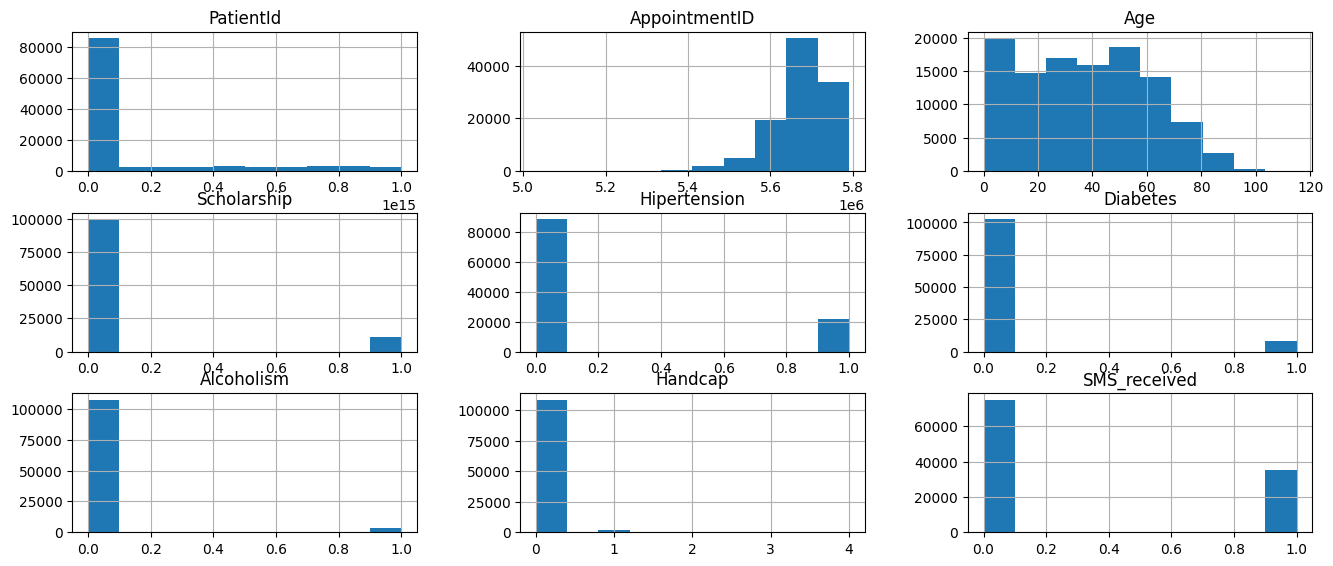

In [10]:
df.hist(figsize=(16,6.5))

In [11]:
df.drop(['AppointmentID','PatientId','ScheduledDay','AppointmentDay'],inplace=True,axis=1)

In [12]:
df.drop(['Neighbourhood'],inplace=True,axis=1)

In [13]:
dfshow=df["No-show"]=='No'
dfNoShow=df["No-show"]=='Yes'

In [14]:
df[dfshow].count(),df[dfNoShow].count()

(Gender          88207
 Age             88207
 Scholarship     88207
 Hipertension    88207
 Diabetes        88207
 Alcoholism      88207
 Handcap         88207
 SMS_received    88207
 No-show         88207
 dtype: int64,
 Gender          22319
 Age             22319
 Scholarship     22319
 Hipertension    22319
 Diabetes        22319
 Alcoholism      22319
 Handcap         22319
 SMS_received    22319
 No-show         22319
 dtype: int64)

In [15]:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)

Text(0, 0.5, 'age')

<Figure size 1600x400 with 0 Axes>

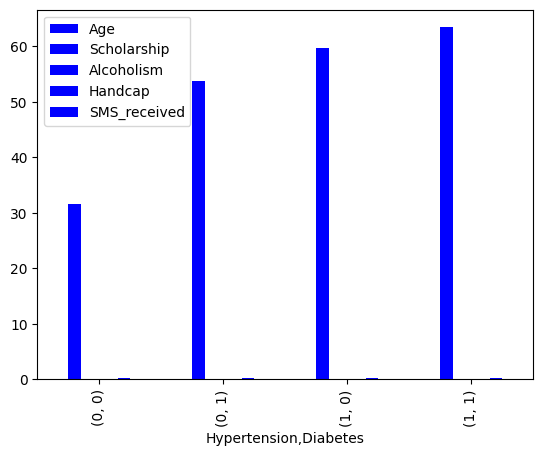

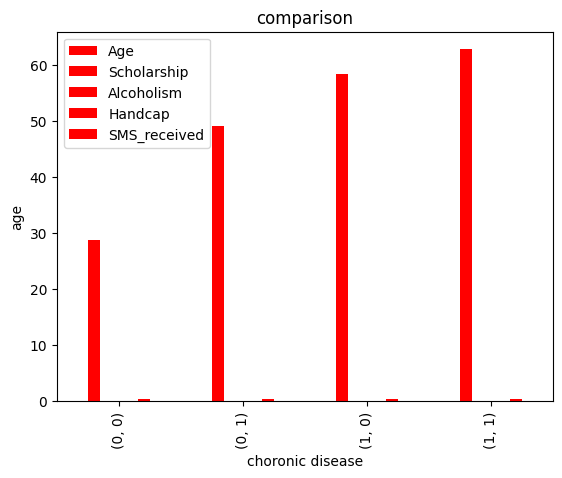

In [16]:
plt.figure(figsize=(16,4))
df[dfshow].groupby(['Hypertension','Diabetes']).mean(['Age']).plot(kind='bar',color='blue',label='show')
df[dfNoShow].groupby(['Hypertension','Diabetes']).mean(['Age']).plot(kind='bar',color='red',label='NoShow')
plt.legend()
plt.title('comparison')
plt.xlabel('choronic disease')
plt.ylabel('age')



In [17]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

In [18]:
df

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
110522,F,56,0,0,0,0,0,1,0
110523,F,51,0,0,0,0,0,1,0
110524,F,21,0,0,0,0,0,1,0
110525,F,38,0,0,0,0,0,1,0


In [19]:
# correlation_matrix = df.corr()

In [20]:
df_encoded = pd.get_dummies(df, columns=['Gender'])

In [21]:
df_encoded

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gender_F,Gender_M
0,62,0,1,0,0,0,0,0,True,False
1,56,0,0,0,0,0,0,0,False,True
2,62,0,0,0,0,0,0,0,True,False
3,8,0,0,0,0,0,0,0,True,False
4,56,0,1,1,0,0,0,0,True,False
...,...,...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,0,True,False
110523,51,0,0,0,0,0,1,0,True,False
110524,21,0,0,0,0,0,1,0,True,False
110525,38,0,0,0,0,0,1,0,True,False


In [22]:
correlation_matrix = df_encoded.corr()

In [23]:
correlation_matrix

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gender_F,Gender_M
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327,0.106452,-0.106452
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134,0.114296,-0.114296
Hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704,0.055722,-0.055722
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181,0.032556,-0.032556
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197,-0.106166,0.106166
Handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077,-0.022813,0.022813
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428,0.046302,-0.046302
No-show,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000,0.004122,-0.004122
Gender_F,0.106452,0.114296,0.055722,0.032556,-0.106166,-0.022813,0.046302,0.004122,1.000000,-1.000000
Gender_M,-0.106452,-0.114296,-0.055722,-0.032556,0.106166,0.022813,-0.046302,-0.004122,-1.000000,1.000000


In [24]:
correlation_with_no_show = correlation_matrix['No-show'].drop('No-show')

In [25]:
correlation_with_no_show

Age            -0.060327
Scholarship     0.029134
Hypertension   -0.035704
Diabetes       -0.015181
Alcoholism     -0.000197
Handcap        -0.006077
SMS_received    0.126428
Gender_F        0.004122
Gender_M       -0.004122
Name: No-show, dtype: float64

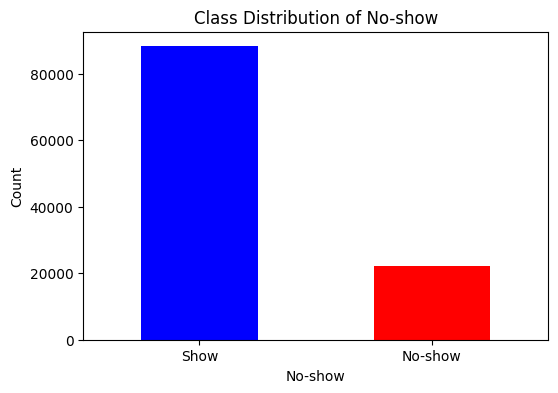

Class Distribution:
No-show
0    88207
1    22319
Name: count, dtype: int64


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Assuming the target variable is 'No-show'

# Count occurrences of each class
class_distribution = df['No-show'].value_counts()

# Visualize class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution of No-show')
plt.xlabel('No-show')
plt.ylabel('Count')
plt.xticks([0, 1], ['Show', 'No-show'], rotation=0)
plt.show()

# Print class distribution counts
print("Class Distribution:")
print(class_distribution)


In [27]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming your DataFrame is named df and target variable is 'No-show'

# Separate features and target variable
X = df_encoded.drop('No-show', axis=1)
y = df_encoded['No-show']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to DataFrame if necessary
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='No-show')], axis=1)

# Check class distribution after resampling
print("Class Distribution after SMOTE:")
print(df_resampled['No-show'].value_counts())


Class Distribution after SMOTE:
No-show
0    88207
1    88207
Name: count, dtype: int64


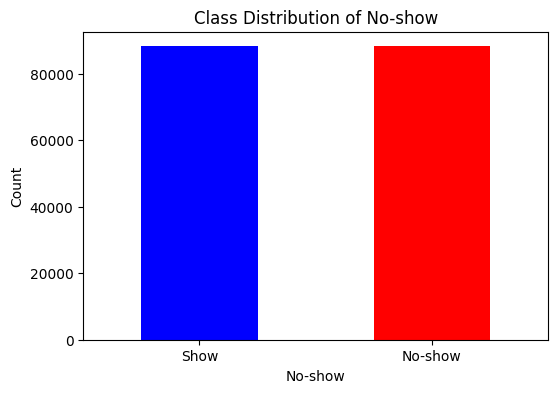

Class Distribution:
No-show
0    88207
1    88207
Name: count, dtype: int64


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Assuming the target variable is 'No-show'

# Count occurrences of each class
class_distribution = df_resampled['No-show'].value_counts()

# Visualize class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution of No-show')
plt.xlabel('No-show')
plt.ylabel('Count')
plt.xticks([0, 1], ['Show', 'No-show'], rotation=0)
plt.show()

# Print class distribution counts
print("Class Distribution:")
print(class_distribution)


In [30]:
df_resampled

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,No-show
0,62,0,1,0,0,0,0,True,False,0
1,56,0,0,0,0,0,0,False,True,0
2,62,0,0,0,0,0,0,True,False,0
3,8,0,0,0,0,0,0,True,False,0
4,56,0,1,1,0,0,0,True,False,0
...,...,...,...,...,...,...,...,...,...,...
176409,9,0,0,0,0,0,1,False,True,1
176410,23,0,0,0,0,0,1,True,False,1
176411,23,0,0,0,0,0,1,True,False,1
176412,60,1,1,0,0,0,1,True,False,1


In [31]:
missing_values = df_resampled.isna().sum()

In [32]:
missing_values

Age             0
Scholarship     0
Hypertension    0
Diabetes        0
Alcoholism      0
Handcap         0
SMS_received    0
Gender_F        0
Gender_M        0
No-show         0
dtype: int64

In [33]:
df_resampled

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,No-show
0,62,0,1,0,0,0,0,True,False,0
1,56,0,0,0,0,0,0,False,True,0
2,62,0,0,0,0,0,0,True,False,0
3,8,0,0,0,0,0,0,True,False,0
4,56,0,1,1,0,0,0,True,False,0
...,...,...,...,...,...,...,...,...,...,...
176409,9,0,0,0,0,0,1,False,True,1
176410,23,0,0,0,0,0,1,True,False,1
176411,23,0,0,0,0,0,1,True,False,1
176412,60,1,1,0,0,0,1,True,False,1


In [34]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176414 entries, 0 to 176413
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Age           176414 non-null  int64
 1   Scholarship   176414 non-null  int64
 2   Hypertension  176414 non-null  int64
 3   Diabetes      176414 non-null  int64
 4   Alcoholism    176414 non-null  int64
 5   Handcap       176414 non-null  int64
 6   SMS_received  176414 non-null  int64
 7   Gender_F      176414 non-null  bool 
 8   Gender_M      176414 non-null  bool 
 9   No-show       176414 non-null  int64
dtypes: bool(2), int64(8)
memory usage: 11.1 MB


In [35]:
df_resampled.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,176414.000000,176414.000000,176414.000000,176414.000000,176414.000000,176414.00000,176414.000000,176414.000000
mean,36.005612,0.101698,0.183313,0.063878,0.025497,0.01730,0.362398,0.500000
std,22.701113,0.302252,0.386924,0.244536,0.157629,0.14204,0.480694,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,35.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.500000
75%,54.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.00000,1.000000,1.000000


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
numerical_cols = ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
df_resampled[numerical_cols] = scaler.fit_transform(df_resampled[numerical_cols])

In [38]:
df_resampled.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.764140e+05,1.764140e+05,1.764140e+05,1.764140e+05,1.764140e+05,1.764140e+05,1.764140e+05,176414.000000
mean,-1.288864e-16,3.254382e-17,7.024309e-17,-4.994348e-17,-2.207180e-17,-3.963257e-17,1.804410e-17,0.500000
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.500001
min,-1.586077e+00,-3.364695e-01,-4.737716e-01,-2.612221e-01,-1.617527e-01,-1.217985e-01,-7.539067e-01,0.000000
25%,-8.372129e-01,-3.364695e-01,-4.737716e-01,-2.612221e-01,-1.617527e-01,-1.217985e-01,-7.539067e-01,0.000000
50%,-4.429803e-02,-3.364695e-01,-4.737716e-01,-2.612221e-01,-1.617527e-01,-1.217985e-01,-7.539067e-01,0.500000
75%,7.926677e-01,-3.364695e-01,-4.737716e-01,-2.612221e-01,-1.617527e-01,-1.217985e-01,1.326424e+00,1.000000
max,3.479768e+00,2.972038e+00,2.110722e+00,3.828160e+00,6.182276e+00,2.803935e+01,1.326424e+00,1.000000


In [39]:
X = df_resampled.drop('No-show', axis=1)
y = df_resampled['No-show']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M
128224,-0.661010,2.972038,-0.473772,-0.261222,-0.161753,-0.121798,-0.753907,True,False
96769,0.220007,-0.336469,2.110722,-0.261222,-0.161753,-0.121798,-0.753907,True,False
105207,1.101023,-0.336469,-0.473772,-0.261222,-0.161753,-0.121798,-0.753907,True,False
96842,2.114193,-0.336469,2.110722,-0.261222,-0.161753,-0.121798,-0.753907,False,True
36306,0.308109,-0.336469,-0.473772,-0.261222,-0.161753,-0.121798,-0.753907,False,True
...,...,...,...,...,...,...,...,...,...
119879,-0.220501,-0.336469,-0.473772,-0.261222,-0.161753,-0.121798,-0.753907,True,False
103694,1.056973,-0.336469,2.110722,-0.261222,-0.161753,-0.121798,-0.753907,False,True
131932,0.440261,-0.336469,-0.473772,-0.261222,-0.161753,-0.121798,1.326424,True,False
146867,-0.705060,-0.336469,-0.473772,-0.261222,-0.161753,-0.121798,-0.753907,True,False


In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

In [43]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [47]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test, y_pred)

In [48]:
report

'              precision    recall  f1-score   support\n\n           0       0.56      0.66      0.61     17644\n           1       0.59      0.47      0.52     17639\n\n    accuracy                           0.57     35283\n   macro avg       0.57      0.57      0.57     35283\nweighted avg       0.57      0.57      0.57     35283\n'

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5694527109372786


In [50]:
report = classification_report(y_test, y_pred, output_dict=True)
# Format and print the classification report
print("Classification Report:")
print("{:<15} {:<15} {:<15} {:<15} {:<15}".format("Class", "Precision", "Recall", "F1-Score", "Support"))
for class_label, metrics in report.items():
    if class_label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    print("{:<15} {:<15.2f} {:<15.2f} {:<15.2f} {:<15}".format(class_label, 
                                                                metrics['precision'], 
                                                                metrics['recall'], 
                                                                metrics['f1-score'], 
                                                                metrics['support']))

Classification Report:
Class           Precision       Recall          F1-Score        Support        
0               0.56            0.66            0.61            17644          
1               0.59            0.47            0.52            17639          


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
conf_matrix

In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()
(tn, fp, fn, tp)